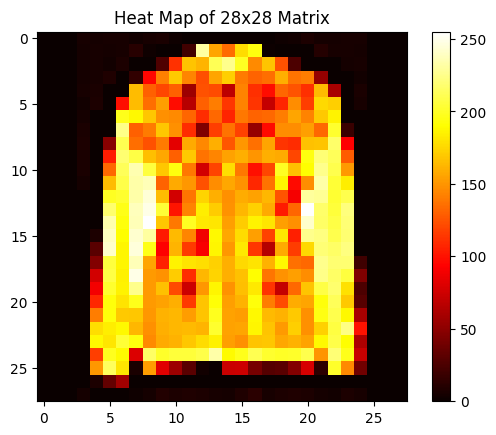

In [ ]:
#%%

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[5,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] == float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 0.9086, Time: 3.55s
Epoch 2, Loss: 0.6784, Time: 3.30s
Epoch 3, Loss: 0.6355, Time: 3.73s
Epoch 4, Loss: 0.6071, Time: 3.67s
Epoch 5, Loss: 0.5843, Time: 3.38s
Epoch 6, Loss: 0.5653, Time: 3.37s
Epoch 7, Loss: 0.5481, Time: 3.45s
Epoch 8, Loss: 0.5336, Time: 3.45s
Epoch 9, Loss: 0.5217, Time: 3.49s
Epoch 10, Loss: 0.5117, Time: 3.54s
Total Training Time: 34.93s
Accuracy: 82.33%


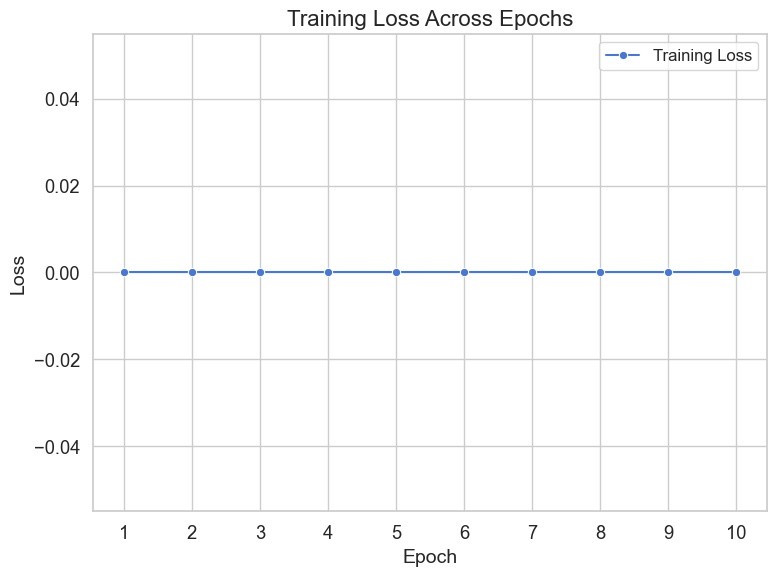

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] = float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

AttributeError: 'Tensor' object has no attribute 'astype'

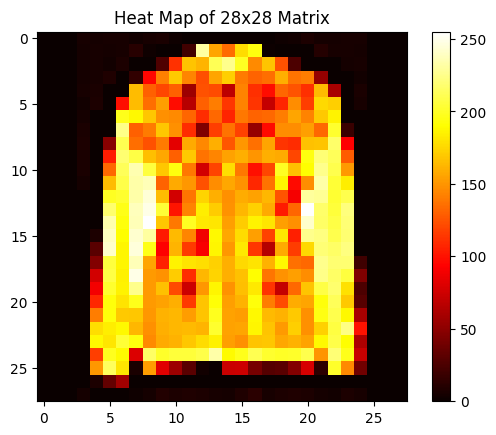

In [ ]:
#%%

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[5,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] = float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 0.8937, Time: 3.32s
Epoch 2, Loss: 0.6670, Time: 3.53s
Epoch 3, Loss: 0.6243, Time: 3.56s
Epoch 4, Loss: 0.5956, Time: 3.43s
Epoch 5, Loss: 0.5719, Time: 3.29s
Epoch 6, Loss: 0.5549, Time: 3.43s
Epoch 7, Loss: 0.5394, Time: 3.34s
Epoch 8, Loss: 0.5288, Time: 3.35s
Epoch 9, Loss: 0.5180, Time: 3.28s
Epoch 10, Loss: 0.5099, Time: 3.33s
Total Training Time: 33.87s
Accuracy: 82.21%


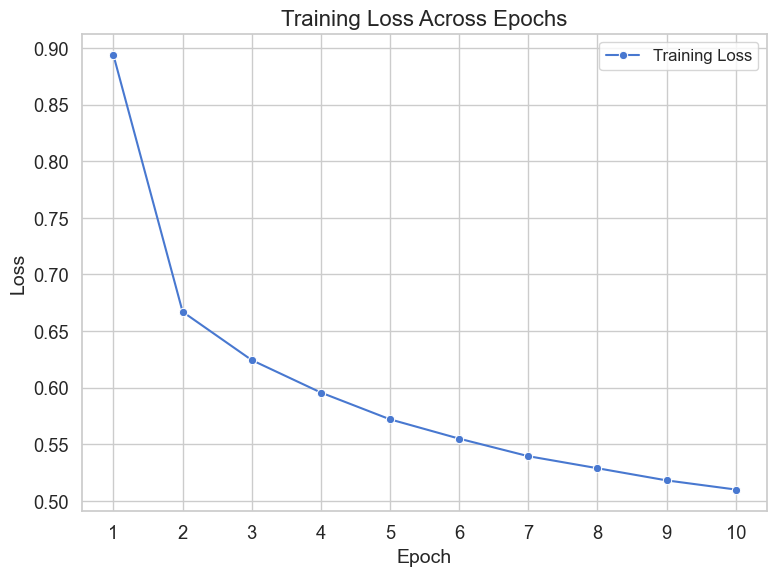

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

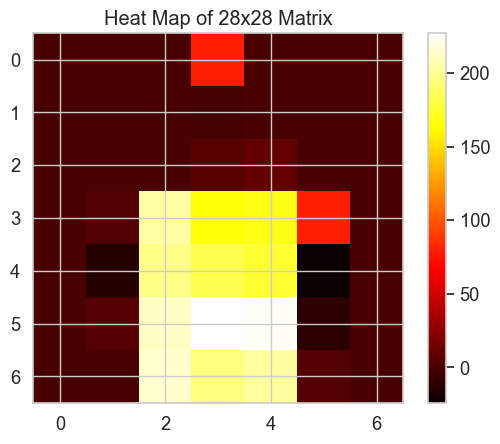

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=128, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9280, Time: 6.25s
Epoch 2, Loss: 1.7041, Time: 6.06s
Epoch 3, Loss: 1.6325, Time: 6.20s
Epoch 4, Loss: 1.6071, Time: 5.86s
Epoch 5, Loss: 1.5799, Time: 5.82s
Epoch 6, Loss: 1.5614, Time: 5.95s
Epoch 7, Loss: 1.5472, Time: 5.82s
Epoch 8, Loss: 1.5325, Time: 5.86s
Epoch 9, Loss: 1.5160, Time: 5.77s
Epoch 10, Loss: 1.5030, Time: 5.85s
Total Training Time: 59.44s
Train Accuracy: 42.7250%
Test Accuracy: 43.0100%


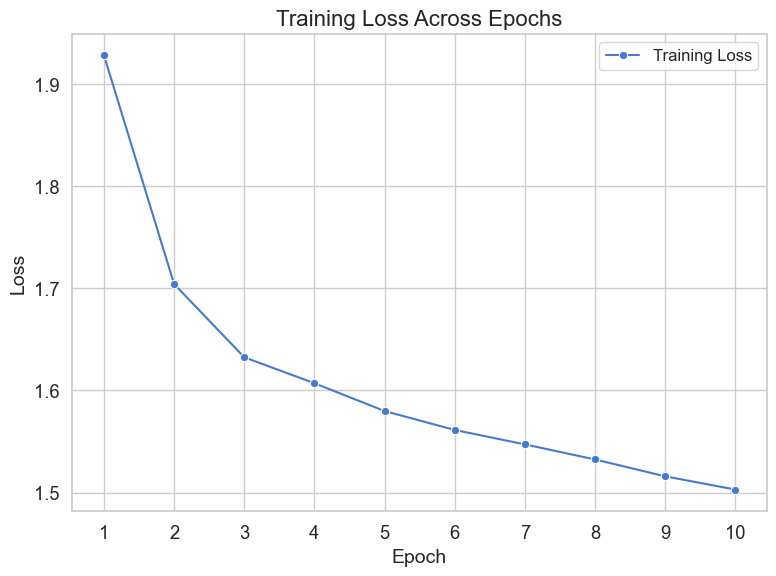

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

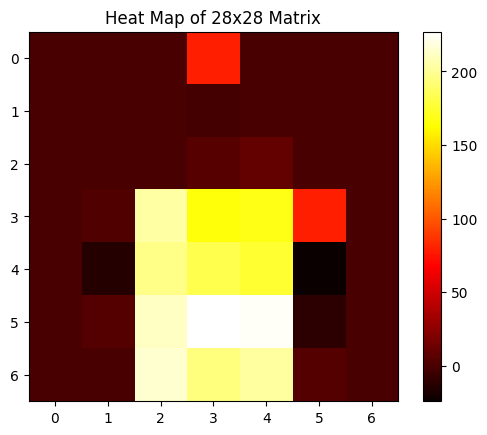

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=128, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0008, Time: 6.34s
Epoch 2, Loss: 1.8744, Time: 6.07s
Epoch 3, Loss: 1.6810, Time: 5.72s
Epoch 4, Loss: 1.5984, Time: 6.03s
Epoch 5, Loss: 1.5745, Time: 5.89s
Epoch 6, Loss: 1.5675, Time: 5.80s
Epoch 7, Loss: 1.5591, Time: 5.77s
Epoch 8, Loss: 1.5491, Time: 5.96s
Epoch 9, Loss: 1.5393, Time: 5.87s
Epoch 10, Loss: 1.5287, Time: 5.82s
Total Training Time: 59.28s
Train Accuracy: 43.0833%
Test Accuracy: 43.3800%


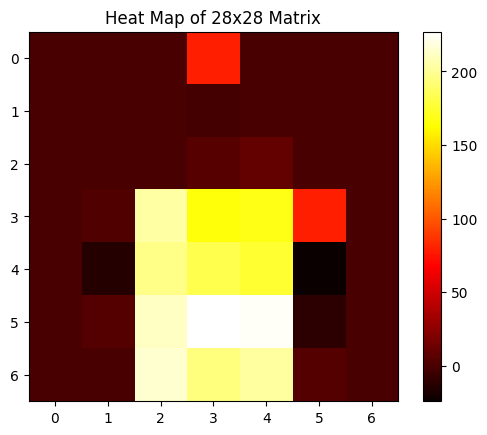

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.8544, Time: 9.43s
Epoch 2, Loss: 1.6190, Time: 9.60s
Epoch 3, Loss: 1.5689, Time: 9.22s
Epoch 4, Loss: 1.5398, Time: 8.97s
Epoch 5, Loss: 1.5193, Time: 9.19s
Epoch 6, Loss: 1.5031, Time: 9.13s
Epoch 7, Loss: 1.4913, Time: 8.96s
Epoch 8, Loss: 1.4806, Time: 9.16s
Epoch 9, Loss: 1.4704, Time: 8.71s
Epoch 10, Loss: 1.4618, Time: 8.96s
Total Training Time: 91.32s
Train Accuracy: 48.0067%
Test Accuracy: 48.0700%


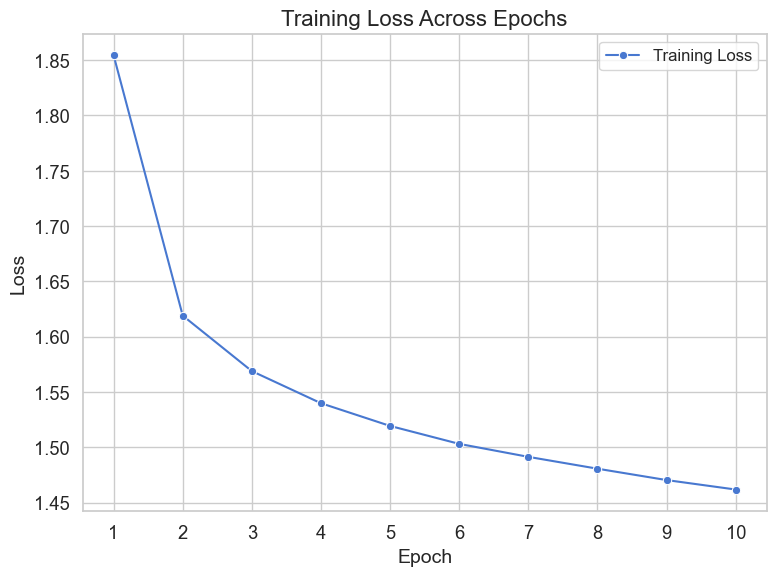

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

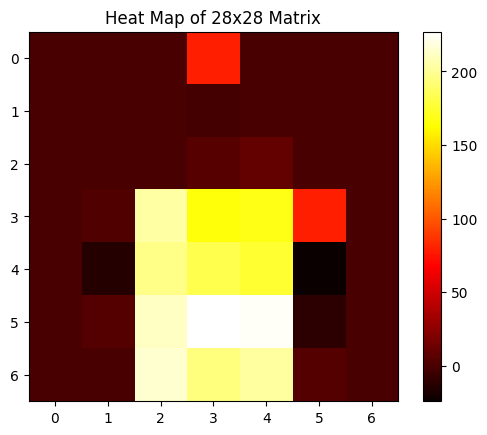

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=16, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9815, Time: 9.44s
Epoch 2, Loss: 1.7560, Time: 9.76s
Epoch 3, Loss: 1.6755, Time: 8.99s
Epoch 4, Loss: 1.6353, Time: 9.05s
Epoch 5, Loss: 1.6075, Time: 8.96s
Epoch 6, Loss: 1.5879, Time: 9.44s
Epoch 7, Loss: 1.5764, Time: 9.02s
Epoch 8, Loss: 1.5682, Time: 8.75s
Epoch 9, Loss: 1.5605, Time: 8.47s
Epoch 10, Loss: 1.5500, Time: 9.09s
Total Training Time: 90.96s
Train Accuracy: 45.5183%
Test Accuracy: 45.6300%


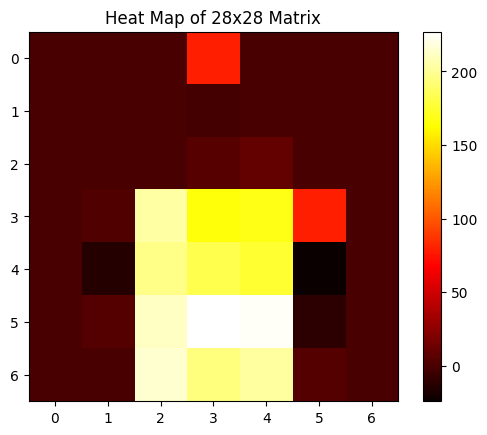

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9376, Time: 9.39s
Epoch 2, Loss: 1.6371, Time: 9.67s
Epoch 3, Loss: 1.5817, Time: 8.82s
Epoch 4, Loss: 1.5660, Time: 8.87s
Epoch 5, Loss: 1.5531, Time: 8.77s
Epoch 6, Loss: 1.5390, Time: 9.21s
Epoch 7, Loss: 1.5183, Time: 8.72s
Epoch 8, Loss: 1.4991, Time: 8.80s
Epoch 9, Loss: 1.4813, Time: 8.82s
Epoch 10, Loss: 1.4684, Time: 8.57s
Total Training Time: 89.64s
Train Accuracy: 46.8883%
Test Accuracy: 47.0900%


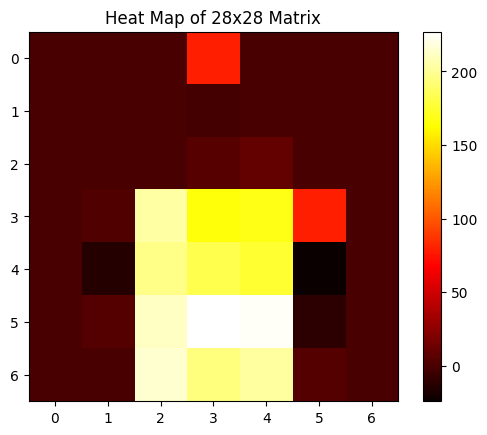

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.8572, Time: 4.69s
Epoch 2, Loss: 1.6389, Time: 4.53s
Epoch 3, Loss: 1.5928, Time: 4.79s
Epoch 4, Loss: 1.5676, Time: 4.99s
Epoch 5, Loss: 1.5465, Time: 5.25s
Epoch 6, Loss: 1.5241, Time: 5.54s
Epoch 7, Loss: 1.5044, Time: 5.53s
Epoch 8, Loss: 1.4882, Time: 5.25s
Epoch 9, Loss: 1.4722, Time: 5.33s
Epoch 10, Loss: 1.4583, Time: 5.08s
Total Training Time: 50.98s
Train Accuracy: 46.8350%
Test Accuracy: 47.6400%


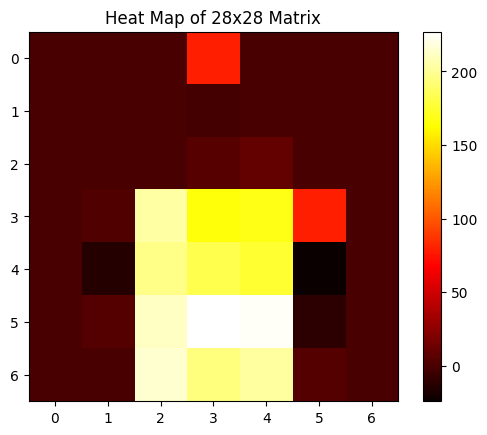

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=128, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=128, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9428, Time: 2.99s
Epoch 2, Loss: 1.7011, Time: 2.73s
Epoch 3, Loss: 1.6370, Time: 3.13s
Epoch 4, Loss: 1.6134, Time: 3.82s
Epoch 5, Loss: 1.5945, Time: 3.47s
Epoch 6, Loss: 1.5713, Time: 3.47s
Epoch 7, Loss: 1.5556, Time: 3.43s
Epoch 8, Loss: 1.5452, Time: 3.52s
Epoch 9, Loss: 1.5370, Time: 3.79s
Epoch 10, Loss: 1.5251, Time: 3.76s
Total Training Time: 34.14s
Train Accuracy: 45.3450%
Test Accuracy: 45.4200%


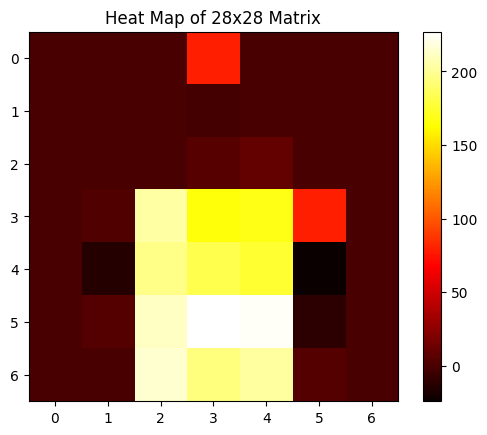

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=256, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=256, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0189, Time: 2.35s
Epoch 2, Loss: 1.8540, Time: 2.17s
Epoch 3, Loss: 1.7277, Time: 2.21s
Epoch 4, Loss: 1.6636, Time: 2.21s
Epoch 5, Loss: 1.6433, Time: 2.38s
Epoch 6, Loss: 1.6279, Time: 2.28s
Epoch 7, Loss: 1.6195, Time: 2.18s
Epoch 8, Loss: 1.6131, Time: 2.35s
Epoch 9, Loss: 1.6059, Time: 2.32s
Epoch 10, Loss: 1.5970, Time: 2.32s
Total Training Time: 22.77s
Train Accuracy: 42.9867%
Test Accuracy: 43.1200%


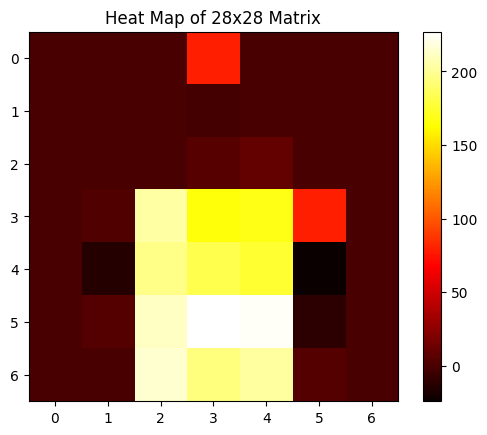

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0809, Time: 5.32s
Epoch 2, Loss: 1.9811, Time: 5.31s
Epoch 3, Loss: 1.9418, Time: 5.44s
Epoch 4, Loss: 1.8982, Time: 5.70s
Epoch 5, Loss: 1.8538, Time: 8.24s
Epoch 6, Loss: 1.8119, Time: 8.38s
Epoch 7, Loss: 1.7735, Time: 6.03s
Epoch 8, Loss: 1.7419, Time: 5.04s
Epoch 9, Loss: 1.7145, Time: 4.90s
Epoch 10, Loss: 1.6896, Time: 4.91s
Total Training Time: 59.28s
Train Accuracy: 36.5417%
Test Accuracy: 36.9200%


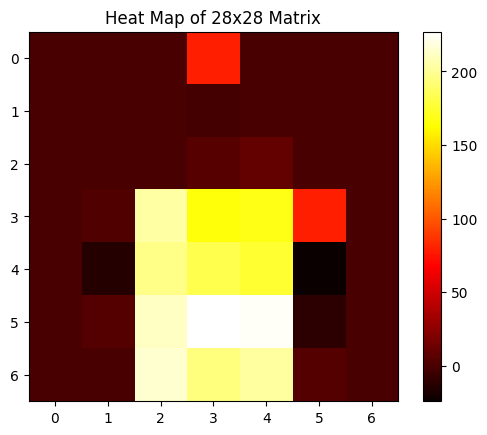

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9428, Time: 5.25s
Epoch 2, Loss: 1.6785, Time: 5.25s
Epoch 3, Loss: 1.6148, Time: 5.29s
Epoch 4, Loss: 1.5863, Time: 4.94s
Epoch 5, Loss: 1.5669, Time: 4.96s
Epoch 6, Loss: 1.5566, Time: 4.87s
Epoch 7, Loss: 1.5444, Time: 4.96s
Epoch 8, Loss: 1.5316, Time: 5.25s
Epoch 9, Loss: 1.5175, Time: 5.43s
Epoch 10, Loss: 1.5053, Time: 5.58s
Total Training Time: 51.79s
Train Accuracy: 43.8317%
Test Accuracy: 44.4500%


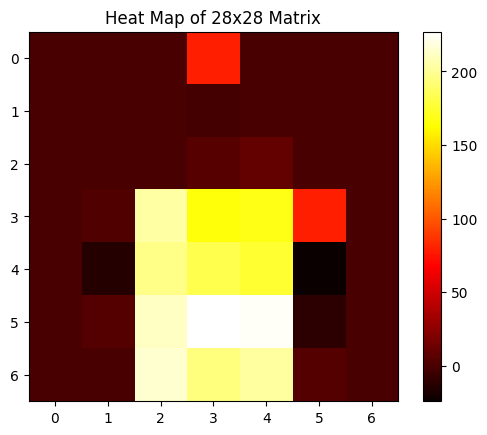

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.8830, Time: 4.63s
Epoch 2, Loss: 1.6662, Time: 4.45s
Epoch 3, Loss: 1.6163, Time: 5.43s
Epoch 4, Loss: 1.5823, Time: 5.25s
Epoch 5, Loss: 1.5569, Time: 5.16s
Epoch 6, Loss: 1.5429, Time: 5.26s
Epoch 7, Loss: 1.5269, Time: 5.20s
Epoch 8, Loss: 1.5067, Time: 5.22s
Epoch 9, Loss: 1.4875, Time: 5.30s
Epoch 10, Loss: 1.4735, Time: 5.62s
Total Training Time: 51.52s
Train Accuracy: 45.2000%
Test Accuracy: 45.3300%


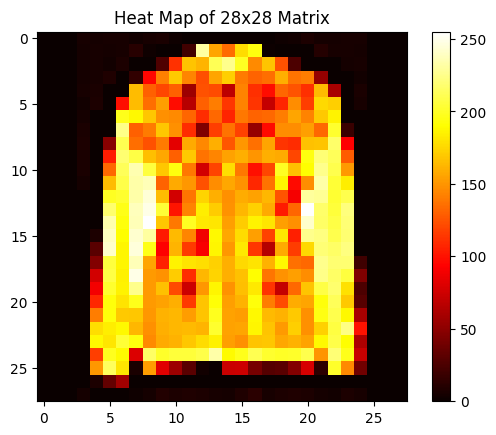

In [ ]:
#%%

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[5,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] = float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 1.2102, Time: 1.49s
Epoch 2, Loss: 0.7293, Time: 1.38s
Epoch 3, Loss: 0.6738, Time: 1.31s
Epoch 4, Loss: 0.6406, Time: 1.34s
Epoch 5, Loss: 0.6164, Time: 1.38s
Epoch 6, Loss: 0.5972, Time: 1.34s
Epoch 7, Loss: 0.5805, Time: 1.40s
Epoch 8, Loss: 0.5666, Time: 1.53s
Epoch 9, Loss: 0.5547, Time: 1.50s
Epoch 10, Loss: 0.5444, Time: 1.49s
Total Training Time: 14.16s
Accuracy: 80.95%


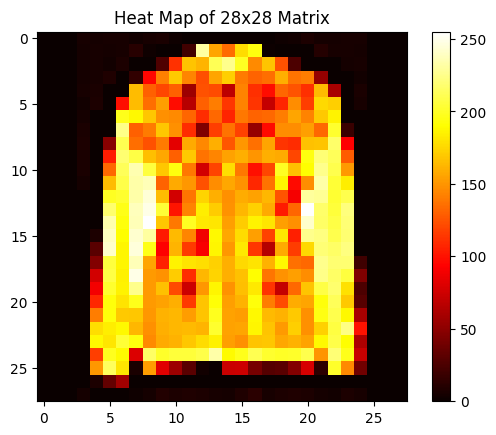

In [ ]:
#%%

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[5,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] = float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 1.0032, Time: 1.83s
Epoch 2, Loss: 0.6801, Time: 1.69s
Epoch 3, Loss: 0.6288, Time: 1.80s
Epoch 4, Loss: 0.5969, Time: 1.78s
Epoch 5, Loss: 0.5746, Time: 1.82s
Epoch 6, Loss: 0.5583, Time: 1.83s
Epoch 7, Loss: 0.5441, Time: 1.81s
Epoch 8, Loss: 0.5323, Time: 1.86s
Epoch 9, Loss: 0.5222, Time: 1.78s
Epoch 10, Loss: 0.5145, Time: 1.73s
Total Training Time: 17.94s
Accuracy: 82.19%


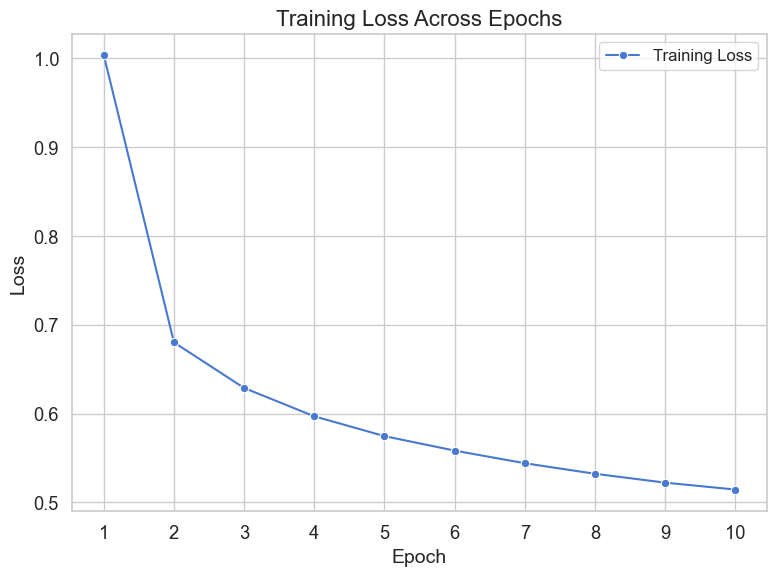

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

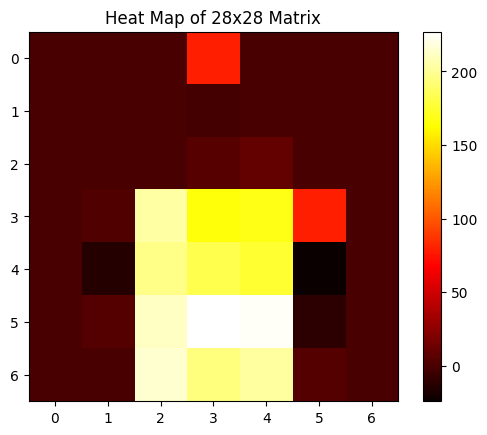

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9971, Time: 5.33s
Epoch 2, Loss: 1.7574, Time: 5.37s
Epoch 3, Loss: 1.6182, Time: 5.41s
Epoch 4, Loss: 1.5801, Time: 5.02s
Epoch 5, Loss: 1.5654, Time: 5.07s
Epoch 6, Loss: 1.5569, Time: 4.89s
Epoch 7, Loss: 1.5475, Time: 5.10s
Epoch 8, Loss: 1.5390, Time: 4.78s
Epoch 9, Loss: 1.5289, Time: 4.84s
Epoch 10, Loss: 1.5208, Time: 4.97s
Total Training Time: 50.78s
Train Accuracy: 47.0150%
Test Accuracy: 47.2800%


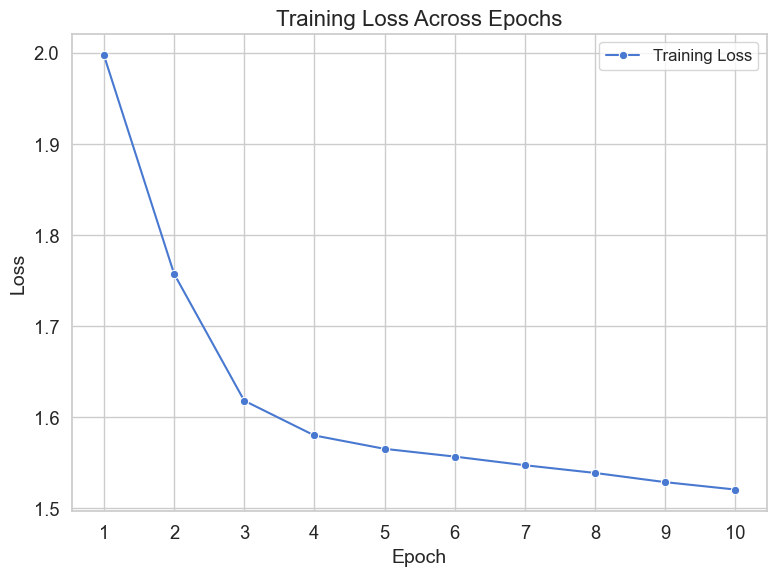

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

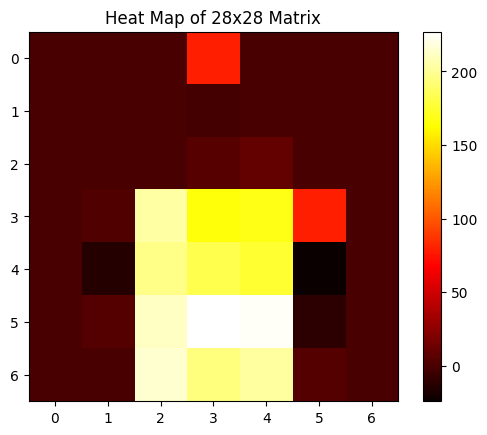

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0225, Time: 6.14s
Epoch 2, Loss: 1.9436, Time: 5.99s
Epoch 3, Loss: 1.8764, Time: 5.94s
Epoch 4, Loss: 1.8325, Time: 5.67s
Epoch 5, Loss: 1.8118, Time: 5.61s
Epoch 6, Loss: 1.8010, Time: 5.79s
Epoch 7, Loss: 1.7947, Time: 5.97s
Epoch 8, Loss: 1.7915, Time: 5.74s
Epoch 9, Loss: 1.7872, Time: 5.67s
Epoch 10, Loss: 1.7837, Time: 5.90s
Epoch 11, Loss: 1.7808, Time: 5.81s
Epoch 12, Loss: 1.7758, Time: 5.68s
Epoch 13, Loss: 1.7730, Time: 6.12s
Epoch 14, Loss: 1.7703, Time: 6.12s
Epoch 15, Loss: 1.7664, Time: 6.07s
Epoch 16, Loss: 1.7639, Time: 5.93s
Epoch 17, Loss: 1.7621, Time: 5.94s
Epoch 18, Loss: 1.7596, Time: 6.01s
Epoch 19, Loss: 1.7566, Time: 5.99s
Epoch 20, Loss: 1.7562, Time: 6.23s
Total Training Time: 118.34s
Train Accuracy: 31.3633%
Test Accuracy: 31.9300%


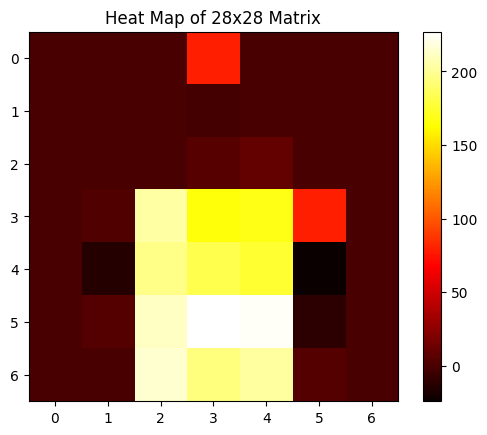

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]
for epoch in range(10):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.8914, Time: 5.81s
Epoch 2, Loss: 1.6743, Time: 5.84s
Epoch 3, Loss: 1.6210, Time: 5.85s
Epoch 4, Loss: 1.5953, Time: 5.39s
Epoch 5, Loss: 1.5668, Time: 5.38s
Epoch 6, Loss: 1.5440, Time: 5.52s
Epoch 7, Loss: 1.5306, Time: 5.49s
Epoch 8, Loss: 1.5131, Time: 5.35s
Epoch 9, Loss: 1.5011, Time: 5.47s
Epoch 10, Loss: 1.4867, Time: 5.33s
Total Training Time: 55.45s
Train Accuracy: 46.3267%
Test Accuracy: 46.9200%


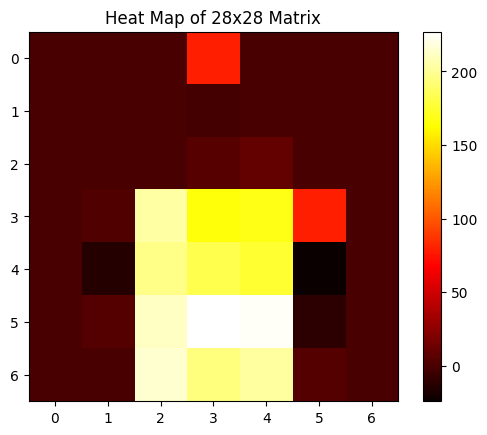

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9258, Time: 5.85s
Epoch 2, Loss: 1.7173, Time: 5.67s
Epoch 3, Loss: 1.6362, Time: 5.76s
Epoch 4, Loss: 1.6093, Time: 5.57s
Epoch 5, Loss: 1.5829, Time: 5.51s
Epoch 6, Loss: 1.5588, Time: 5.49s
Epoch 7, Loss: 1.5386, Time: 5.58s
Epoch 8, Loss: 1.5219, Time: 5.64s
Epoch 9, Loss: 1.5074, Time: 5.54s
Epoch 10, Loss: 1.4944, Time: 5.41s
Epoch 11, Loss: 1.4827, Time: 5.48s
Epoch 12, Loss: 1.4721, Time: 5.57s
Epoch 13, Loss: 1.4626, Time: 5.48s
Epoch 14, Loss: 1.4523, Time: 5.41s
Epoch 15, Loss: 1.4436, Time: 5.53s
Epoch 16, Loss: 1.4388, Time: 5.63s
Epoch 17, Loss: 1.4292, Time: 5.63s
Epoch 18, Loss: 1.4243, Time: 5.56s
Epoch 19, Loss: 1.4200, Time: 5.80s
Epoch 20, Loss: 1.4133, Time: 5.89s
Total Training Time: 112.02s
Train Accuracy: 51.3133%
Test Accuracy: 51.4800%


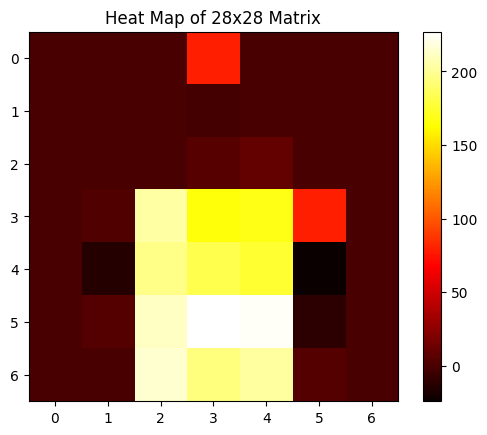

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        #self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        #x = F.relu(x)
        #x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.1019, Time: 4.92s
Epoch 2, Loss: 1.9950, Time: 4.88s
Epoch 3, Loss: 1.9409, Time: 4.92s
Epoch 4, Loss: 1.8722, Time: 4.71s
Epoch 5, Loss: 1.8195, Time: 4.85s
Epoch 6, Loss: 1.7919, Time: 4.87s
Epoch 7, Loss: 1.7772, Time: 4.89s
Epoch 8, Loss: 1.7687, Time: 4.80s
Epoch 9, Loss: 1.7649, Time: 4.70s
Epoch 10, Loss: 1.7619, Time: 4.67s
Epoch 11, Loss: 1.7607, Time: 4.64s
Epoch 12, Loss: 1.7584, Time: 4.60s
Epoch 13, Loss: 1.7561, Time: 4.77s
Epoch 14, Loss: 1.7537, Time: 4.59s
Epoch 15, Loss: 1.7501, Time: 4.62s
Epoch 16, Loss: 1.7451, Time: 4.74s
Epoch 17, Loss: 1.7410, Time: 4.65s
Epoch 18, Loss: 1.7381, Time: 4.63s
Epoch 19, Loss: 1.7363, Time: 4.77s
Epoch 20, Loss: 1.7343, Time: 4.72s
Total Training Time: 94.95s
Train Accuracy: 32.9533%
Test Accuracy: 33.5200%


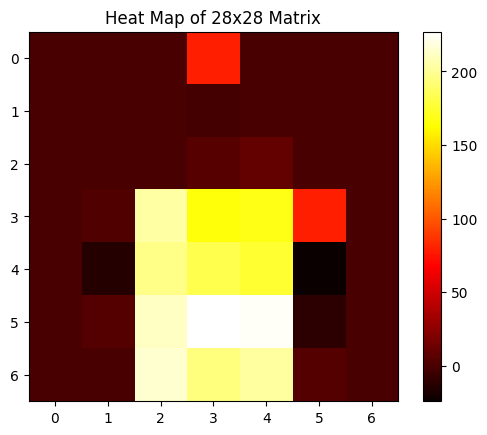

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        #self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        #x = F.relu(x)
        #x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0797, Time: 4.48s
Epoch 2, Loss: 1.9365, Time: 4.33s
Epoch 3, Loss: 1.8510, Time: 4.52s
Epoch 4, Loss: 1.8000, Time: 4.70s
Epoch 5, Loss: 1.7780, Time: 4.86s
Epoch 6, Loss: 1.7665, Time: 4.58s
Epoch 7, Loss: 1.7573, Time: 4.71s
Epoch 8, Loss: 1.7507, Time: 4.83s
Epoch 9, Loss: 1.7437, Time: 4.69s
Epoch 10, Loss: 1.7400, Time: 4.56s
Epoch 11, Loss: 1.7375, Time: 4.54s
Epoch 12, Loss: 1.7353, Time: 4.95s
Epoch 13, Loss: 1.7340, Time: 4.92s
Epoch 14, Loss: 1.7328, Time: 4.77s
Epoch 15, Loss: 1.7320, Time: 4.79s
Epoch 16, Loss: 1.7315, Time: 4.69s
Epoch 17, Loss: 1.7308, Time: 4.67s
Epoch 18, Loss: 1.7301, Time: 4.78s
Epoch 19, Loss: 1.7293, Time: 4.68s
Epoch 20, Loss: 1.7290, Time: 4.75s
Total Training Time: 93.79s
Train Accuracy: 32.9550%
Test Accuracy: 33.8000%


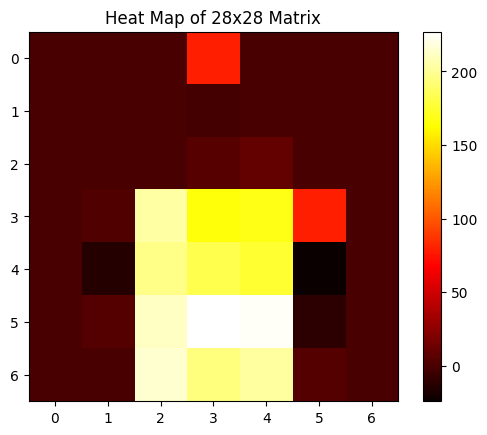

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.8891, Time: 5.85s
Epoch 2, Loss: 1.6663, Time: 5.83s
Epoch 3, Loss: 1.6189, Time: 5.77s
Epoch 4, Loss: 1.5862, Time: 5.52s
Epoch 5, Loss: 1.5586, Time: 5.48s
Epoch 6, Loss: 1.5371, Time: 5.61s
Epoch 7, Loss: 1.5205, Time: 5.59s
Epoch 8, Loss: 1.5012, Time: 5.54s
Epoch 9, Loss: 1.4846, Time: 5.54s
Epoch 10, Loss: 1.4685, Time: 5.55s
Epoch 11, Loss: 1.4500, Time: 5.72s
Epoch 12, Loss: 1.4331, Time: 5.48s
Epoch 13, Loss: 1.4170, Time: 5.48s
Epoch 14, Loss: 1.4050, Time: 5.48s
Epoch 15, Loss: 1.3965, Time: 5.53s
Epoch 16, Loss: 1.3884, Time: 5.55s
Epoch 17, Loss: 1.3818, Time: 5.41s
Epoch 18, Loss: 1.3745, Time: 5.45s
Epoch 19, Loss: 1.3690, Time: 5.51s
Epoch 20, Loss: 1.3619, Time: 5.52s
Total Training Time: 111.41s
Train Accuracy: 52.4200%
Test Accuracy: 52.5600%


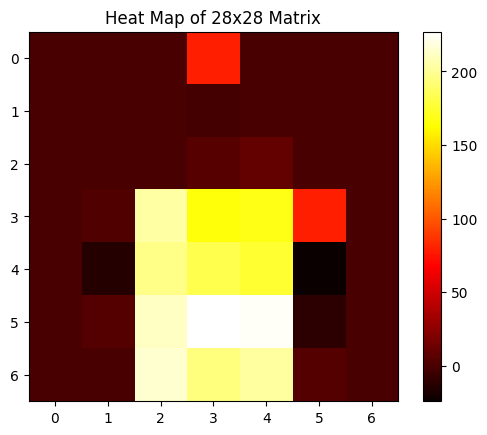

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=16, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0657, Time: 5.86s
Epoch 2, Loss: 1.9728, Time: 5.78s
Epoch 3, Loss: 1.9255, Time: 5.80s
Epoch 4, Loss: 1.8567, Time: 5.54s
Epoch 5, Loss: 1.7963, Time: 5.51s
Epoch 6, Loss: 1.7546, Time: 5.72s
Epoch 7, Loss: 1.7196, Time: 5.56s
Epoch 8, Loss: 1.6880, Time: 5.54s
Epoch 9, Loss: 1.6613, Time: 5.56s
Epoch 10, Loss: 1.6428, Time: 5.55s
Epoch 11, Loss: 1.6296, Time: 5.50s
Epoch 12, Loss: 1.6196, Time: 5.59s
Epoch 13, Loss: 1.6122, Time: 5.45s
Epoch 14, Loss: 1.6055, Time: 5.61s
Epoch 15, Loss: 1.6007, Time: 5.54s
Epoch 16, Loss: 1.5958, Time: 5.55s
Epoch 17, Loss: 1.5913, Time: 5.52s
Epoch 18, Loss: 1.5876, Time: 5.59s
Epoch 19, Loss: 1.5828, Time: 5.50s
Epoch 20, Loss: 1.5775, Time: 5.67s
Total Training Time: 111.95s
Train Accuracy: 42.4683%
Test Accuracy: 42.2800%


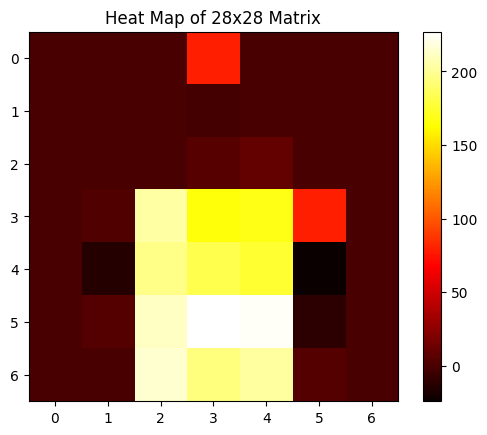

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=16, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 2.0034, Time: 5.90s
Epoch 2, Loss: 1.7795, Time: 5.90s
Epoch 3, Loss: 1.6344, Time: 5.72s
Epoch 4, Loss: 1.5898, Time: 5.56s
Epoch 5, Loss: 1.5751, Time: 5.68s
Epoch 6, Loss: 1.5640, Time: 5.63s
Epoch 7, Loss: 1.5576, Time: 5.60s
Epoch 8, Loss: 1.5499, Time: 5.76s
Epoch 9, Loss: 1.5404, Time: 5.56s
Epoch 10, Loss: 1.5314, Time: 5.66s
Epoch 11, Loss: 1.5221, Time: 5.53s
Epoch 12, Loss: 1.5112, Time: 5.61s
Epoch 13, Loss: 1.5045, Time: 5.75s
Epoch 14, Loss: 1.4948, Time: 5.77s
Epoch 15, Loss: 1.4868, Time: 5.62s
Epoch 16, Loss: 1.4774, Time: 5.74s
Epoch 17, Loss: 1.4715, Time: 5.56s
Epoch 18, Loss: 1.4626, Time: 5.53s
Epoch 19, Loss: 1.4560, Time: 5.50s
Epoch 20, Loss: 1.4474, Time: 5.49s
Total Training Time: 113.06s
Train Accuracy: 40.0767%
Test Accuracy: 40.7500%


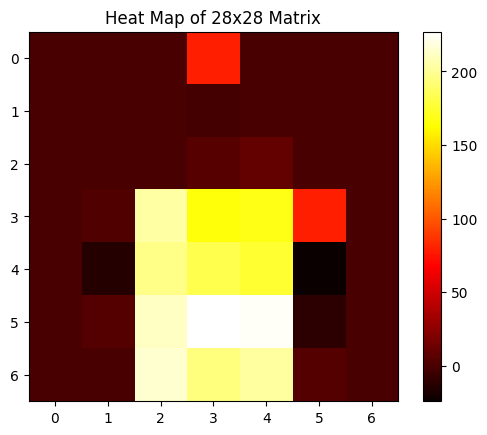

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9964, Time: 5.83s
Epoch 2, Loss: 1.8930, Time: 5.79s
Epoch 3, Loss: 1.8341, Time: 5.75s
Epoch 4, Loss: 1.8089, Time: 5.48s
Epoch 5, Loss: 1.7974, Time: 5.62s
Epoch 6, Loss: 1.7917, Time: 5.55s
Epoch 7, Loss: 1.7877, Time: 5.50s
Epoch 8, Loss: 1.7829, Time: 5.57s
Epoch 9, Loss: 1.7793, Time: 5.59s
Epoch 10, Loss: 1.7727, Time: 5.44s
Epoch 11, Loss: 1.7658, Time: 5.55s
Epoch 12, Loss: 1.7614, Time: 5.46s
Epoch 13, Loss: 1.7578, Time: 5.65s
Epoch 14, Loss: 1.7546, Time: 5.46s
Epoch 15, Loss: 1.7508, Time: 5.54s
Epoch 16, Loss: 1.7479, Time: 5.59s
Epoch 17, Loss: 1.7472, Time: 5.64s
Epoch 18, Loss: 1.7454, Time: 5.50s
Epoch 19, Loss: 1.7446, Time: 5.50s
Epoch 20, Loss: 1.7428, Time: 5.50s
Total Training Time: 111.51s
Train Accuracy: 32.6400%
Test Accuracy: 33.1800%


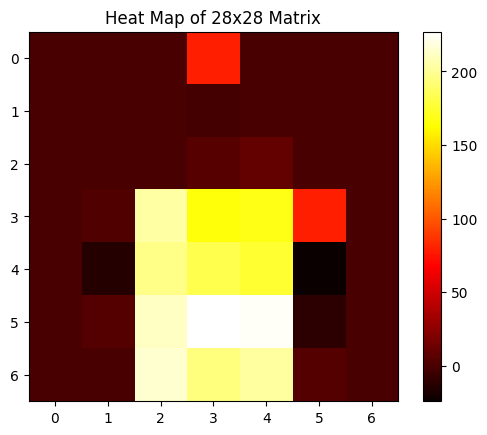

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(20)]
for epoch in range(20):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9245, Time: 5.97s
Epoch 2, Loss: 1.6657, Time: 5.83s
Epoch 3, Loss: 1.6175, Time: 5.72s
Epoch 4, Loss: 1.5812, Time: 5.59s
Epoch 5, Loss: 1.5536, Time: 5.46s
Epoch 6, Loss: 1.5376, Time: 5.58s
Epoch 7, Loss: 1.5207, Time: 5.62s
Epoch 8, Loss: 1.5118, Time: 5.66s
Epoch 9, Loss: 1.4982, Time: 5.49s
Epoch 10, Loss: 1.4855, Time: 5.54s
Epoch 11, Loss: 1.4710, Time: 5.50s
Epoch 12, Loss: 1.4573, Time: 5.75s
Epoch 13, Loss: 1.4404, Time: 6.77s
Epoch 14, Loss: 1.4245, Time: 7.97s
Epoch 15, Loss: 1.4104, Time: 7.88s
Epoch 16, Loss: 1.3968, Time: 7.52s
Epoch 17, Loss: 1.3854, Time: 7.79s
Epoch 18, Loss: 1.3755, Time: 8.22s
Epoch 19, Loss: 1.3671, Time: 8.28s
Epoch 20, Loss: 1.3583, Time: 8.48s
Total Training Time: 130.61s
Train Accuracy: 52.5283%
Test Accuracy: 52.6500%


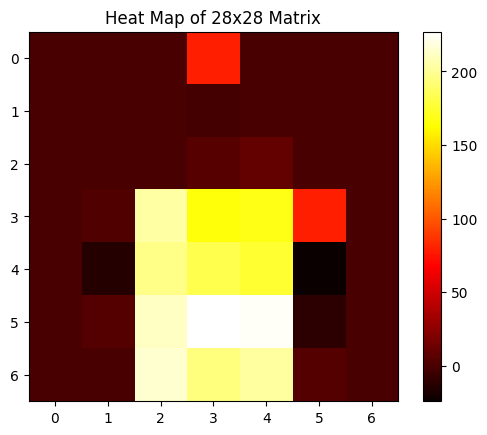

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(50)]
for epoch in range(50):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9495, Time: 5.78s
Epoch 2, Loss: 1.6968, Time: 5.80s
Epoch 3, Loss: 1.6221, Time: 5.70s
Epoch 4, Loss: 1.5992, Time: 5.52s
Epoch 5, Loss: 1.5748, Time: 5.56s
Epoch 6, Loss: 1.5534, Time: 5.57s
Epoch 7, Loss: 1.5394, Time: 5.47s
Epoch 8, Loss: 1.5252, Time: 5.54s
Epoch 9, Loss: 1.5110, Time: 5.51s
Epoch 10, Loss: 1.4950, Time: 5.69s
Epoch 11, Loss: 1.4794, Time: 5.53s
Epoch 12, Loss: 1.4686, Time: 5.46s
Epoch 13, Loss: 1.4587, Time: 5.55s
Epoch 14, Loss: 1.4468, Time: 5.61s
Epoch 15, Loss: 1.4402, Time: 5.53s
Epoch 16, Loss: 1.4302, Time: 5.61s
Epoch 17, Loss: 1.4231, Time: 5.48s
Epoch 18, Loss: 1.4192, Time: 5.57s
Epoch 19, Loss: 1.4085, Time: 5.46s
Epoch 20, Loss: 1.4034, Time: 5.42s
Epoch 21, Loss: 1.3988, Time: 5.39s
Epoch 22, Loss: 1.3915, Time: 5.38s
Epoch 23, Loss: 1.3878, Time: 5.34s
Epoch 24, Loss: 1.3840, Time: 5.62s
Epoch 25, Loss: 1.3785, Time: 5.59s
Epoch 26, Loss: 1.3783, Time: 5.63s
Epoch 27, Loss: 1.3730, Time: 5.46s
Epoch 28, Loss: 1.3713, Time: 5.62s
E

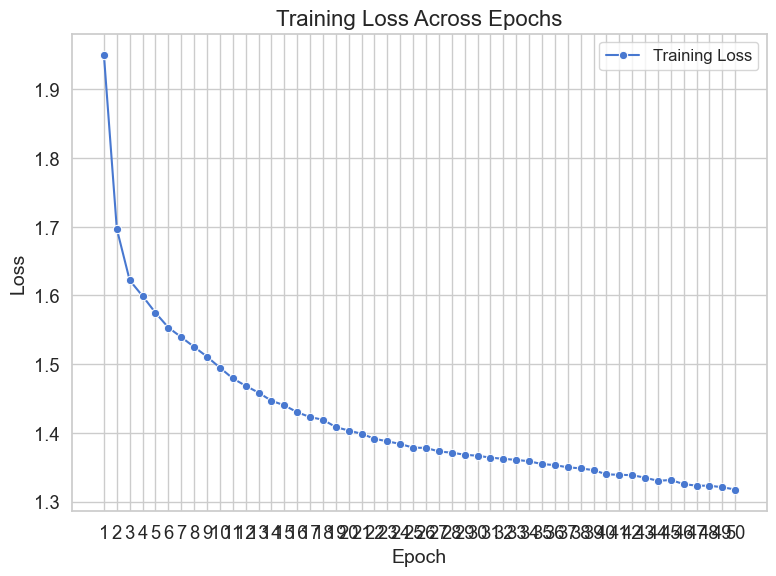

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 51)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

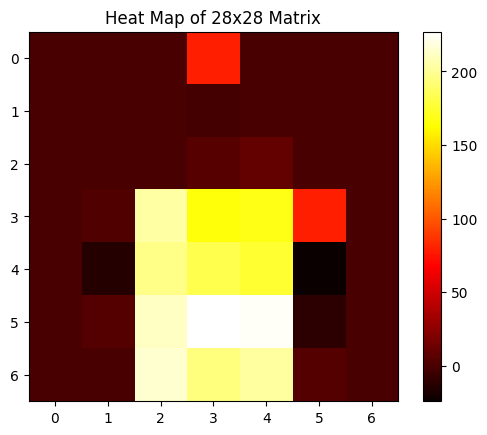

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(30)]
for epoch in range(30):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9151, Time: 5.88s
Epoch 2, Loss: 1.6687, Time: 5.79s
Epoch 3, Loss: 1.6158, Time: 5.75s
Epoch 4, Loss: 1.5884, Time: 5.56s
Epoch 5, Loss: 1.5704, Time: 5.59s
Epoch 6, Loss: 1.5572, Time: 5.69s
Epoch 7, Loss: 1.5470, Time: 5.62s
Epoch 8, Loss: 1.5351, Time: 5.54s
Epoch 9, Loss: 1.5235, Time: 5.47s
Epoch 10, Loss: 1.5099, Time: 5.47s
Epoch 11, Loss: 1.4878, Time: 5.53s
Epoch 12, Loss: 1.4685, Time: 5.40s
Epoch 13, Loss: 1.4514, Time: 5.41s
Epoch 14, Loss: 1.4365, Time: 5.47s
Epoch 15, Loss: 1.4221, Time: 5.58s
Epoch 16, Loss: 1.4107, Time: 5.36s
Epoch 17, Loss: 1.4006, Time: 5.42s
Epoch 18, Loss: 1.3918, Time: 5.43s
Epoch 19, Loss: 1.3816, Time: 5.49s
Epoch 20, Loss: 1.3756, Time: 5.42s
Epoch 21, Loss: 1.3674, Time: 5.60s
Epoch 22, Loss: 1.3621, Time: 5.44s
Epoch 23, Loss: 1.3571, Time: 5.44s
Epoch 24, Loss: 1.3514, Time: 5.53s
Epoch 25, Loss: 1.3479, Time: 5.61s
Epoch 26, Loss: 1.3417, Time: 5.54s
Epoch 27, Loss: 1.3345, Time: 5.51s
Epoch 28, Loss: 1.3352, Time: 5.54s
E

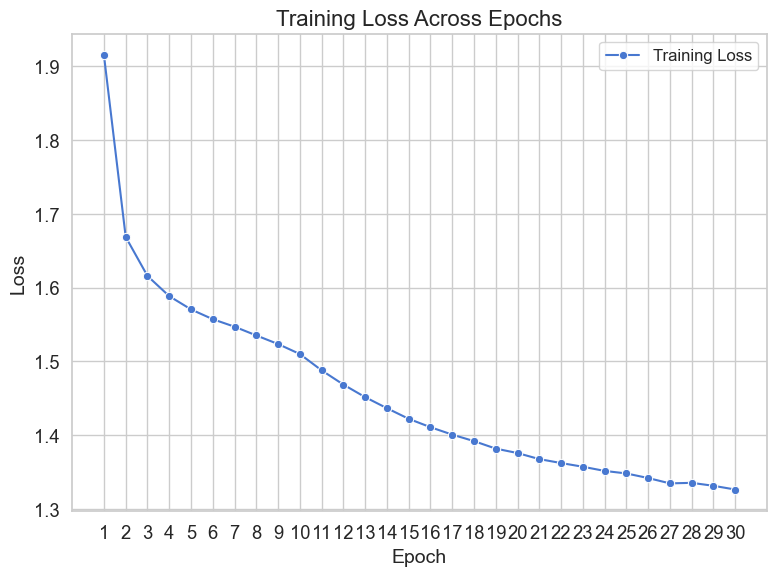

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 31)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

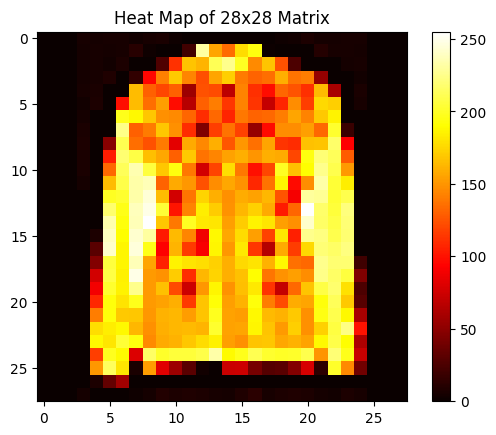

In [ ]:
#%%

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[5,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

In [ ]:
#%%

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
# Define the CNN model
class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 3 * 3, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv + ReLU + Pooling
        x = x.view(-1, 16 * 3 * 3)           # Flatten
        x = self.fc1(x)                      # Fully connected layer
        return F.log_softmax(x, dim=1)

# Downsample the dataset to 7x7
def preprocess_mnist_like_data(X, y, size=7):
    # Reshape and normalize
    X = X.reshape(-1, 1, 28, 28).astype('float32') / 255.0  # (N, 1, 28, 28)
    X = torch.tensor(X)
    # Resize to 7x7
    transform = transforms.Resize((size, size))
    X_resized = torch.stack([transform(img) for img in X])
    y = torch.tensor(y, dtype=torch.long)
    return X_resized, y

# Replace with actual MNIST-like data
# X_train, y_train, X_test, y_test are numpy arrays
X_train, y_train = preprocess_mnist_like_data(X_train, y_train, size=7)
X_test, y_test = preprocess_mnist_like_data(X_test, y_test, size=7)

# Prepare datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss, and optimizer
num_classes = len(set(y_train.numpy()))  # Determine number of classes
model = SmallCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(10)]

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_start_time = time.time()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and print epoch time
    epoch_time = time.time() - epoch_start_time
    loss = running_loss / len(train_loader)
    lossdata[epoch] = float(loss)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Time: {epoch_time:.2f}s")

# Total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 0.9826, Time: 1.98s
Epoch 2, Loss: 0.6712, Time: 2.16s
Epoch 3, Loss: 0.6234, Time: 2.19s
Epoch 4, Loss: 0.5936, Time: 2.07s
Epoch 5, Loss: 0.5736, Time: 2.12s
Epoch 6, Loss: 0.5551, Time: 2.20s
Epoch 7, Loss: 0.5422, Time: 2.16s
Epoch 8, Loss: 0.5304, Time: 2.05s
Epoch 9, Loss: 0.5219, Time: 2.05s
Epoch 10, Loss: 0.5122, Time: 2.25s
Total Training Time: 21.24s
Accuracy: 82.00%


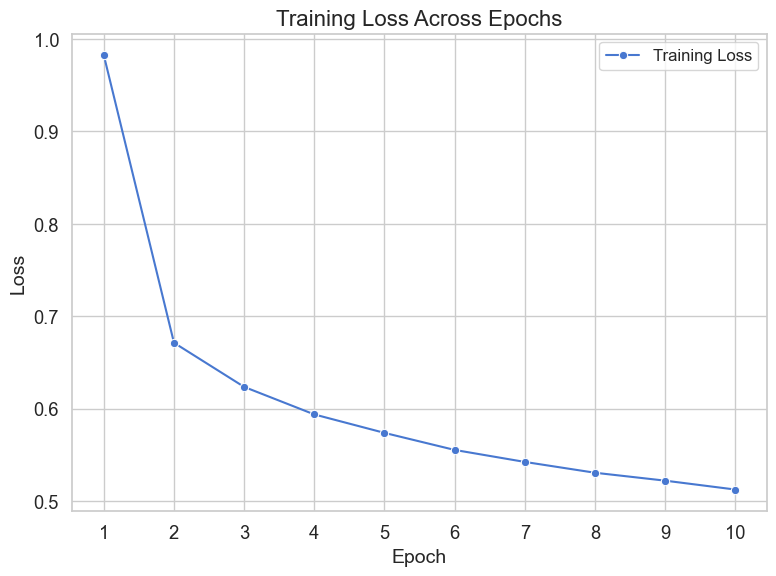

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 11)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

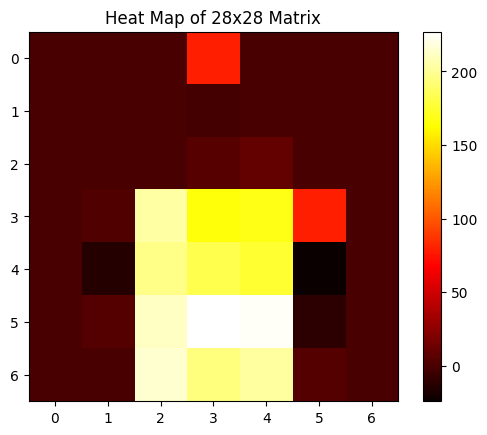

In [ ]:
#%% Data prepare

import os
os.chdir("C:\\Users\\bigbi\\Desktop\\thesis")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np 
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

m1 = train.iloc[9,1:785]
m1 = m1.values.flatten()
m1 =  m1.reshape((28,28))
m1 = zoom(m1,(0.25, 0.25))
plt.imshow(m1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of 28x28 Matrix')
plt.show()


mnist_train = pd.read_csv('fashion-mnist_train.csv')
mnist_test = pd.read_csv('fashion-mnist_test.csv')
X_train = mnist_train.iloc[:, 1:].values  # Pixel values
y_train = mnist_train.iloc[:, 0].values   # Labels

X_test = mnist_test.iloc[:, 1:].values  # Pixel values
y_test = mnist_test.iloc[:, 0].values   # Labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#%% Convert to graph

from scipy.ndimage import zoom
import torch_geometric.utils as utils
from torch_geometric.utils import grid
def convert_to_graph(X, y):
    graphs = []
    for i in range(len(X)):
        img = X[i].reshape(28, 28)
        img = zoom(img,(0.25, 0.25))
        img = torch.tensor(img, dtype=torch.float).view(-1, 1)
        edge_index = grid(7, 7)
        edge_index = edge_index[0]
        graphs.append(Data(x=img, edge_index=edge_index, y=torch.tensor([y[i]], dtype=torch.long)))
    return graphs

train_graphs = convert_to_graph(X_train, y_train)
test_graphs = convert_to_graph(X_test, y_test)


# Use DataLoader to load data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

d:\vscode\python\python311\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
#%% Training

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels1, hidden_channels2, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, hidden_channels2)
        self.conv3 = GCNConv(hidden_channels2, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = torch_geometric.nn.global_mean_pool(x, data.batch)
        return F.log_softmax(x, dim=1)

import torch.optim as optim

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=1, hidden_channels1=8, hidden_channels2=32, out_channels=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

# Testing function
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

import time
# Start the timer
start_time = time.time()
# Training loop
lossdata = [0 for _ in range(30)]
for epoch in range(30):
    epoch_start_time = time.time()
    train_loss = train()
#    train_acc = test(train_loader)
#    test_acc = test(test_loader)
    epoch_time = time.time() - epoch_start_time
    lossdata[epoch] = float(train_loss)
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Time: {epoch_time:.2f}s') #Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f}s")
# Evaluate the model on the test set
train_acc = test(train_loader)
test_acc = test(test_loader)
print(f'Train Accuracy: {100*train_acc:.4f}%')
print(f'Test Accuracy: {100*test_acc:.4f}%')

Epoch 1, Loss: 1.9601, Time: 5.93s
Epoch 2, Loss: 1.7086, Time: 5.86s
Epoch 3, Loss: 1.6192, Time: 5.86s
Epoch 4, Loss: 1.5852, Time: 5.66s
Epoch 5, Loss: 1.5689, Time: 5.83s
Epoch 6, Loss: 1.5566, Time: 5.69s
Epoch 7, Loss: 1.5436, Time: 5.58s
Epoch 8, Loss: 1.5314, Time: 5.60s
Epoch 9, Loss: 1.5210, Time: 5.63s
Epoch 10, Loss: 1.5107, Time: 5.53s
Epoch 11, Loss: 1.4989, Time: 5.65s
Epoch 12, Loss: 1.4877, Time: 5.48s
Epoch 13, Loss: 1.4786, Time: 5.66s
Epoch 14, Loss: 1.4715, Time: 5.48s
Epoch 15, Loss: 1.4652, Time: 5.50s
Epoch 16, Loss: 1.4603, Time: 5.42s
Epoch 17, Loss: 1.4533, Time: 5.55s
Epoch 18, Loss: 1.4498, Time: 5.45s
Epoch 19, Loss: 1.4435, Time: 5.70s
Epoch 20, Loss: 1.4380, Time: 5.63s
Epoch 21, Loss: 1.4351, Time: 5.58s
Epoch 22, Loss: 1.4309, Time: 5.56s
Epoch 23, Loss: 1.4260, Time: 5.60s
Epoch 24, Loss: 1.4234, Time: 5.57s
Epoch 25, Loss: 1.4178, Time: 5.54s
Epoch 26, Loss: 1.4163, Time: 5.55s
Epoch 27, Loss: 1.4105, Time: 5.44s
Epoch 28, Loss: 1.4073, Time: 5.45s
E

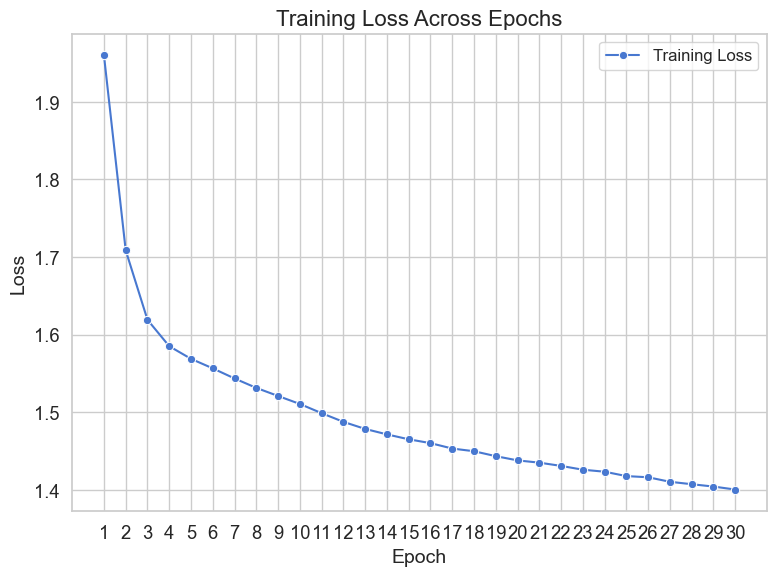

In [ ]:
#%%

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = {
    'epoch': list(range(1, 31)),  # 1 到 10 的 epoch
    'loss': lossdata
}
lossdata = pd.DataFrame(lossdata)
# 设置 Seaborn 样式
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 绘制折线图
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='epoch', y='loss', marker='o', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(df['epoch'])  # 设置 x 轴刻度
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()